# LESSON 7: Support Vector Machines

1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology2. 
Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate

KEGG Metabolic Relation Network (Directed)<br>
Dataset: https://archive.ics.uci.edu/dataset/220/kegg+metabolic+relation+network+directed.

In [1]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd
  
# fetch dataset 
blood = fetch_ucirepo(id=176) 
  
# data (as pandas dataframes) 
X = blood.data.features 
y = blood.data.targets 
  
df = pd.DataFrame(blood.data.original, columns=blood.data.headers)
df

,Recency,Frequency,Monetary,Time,Donated_Blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

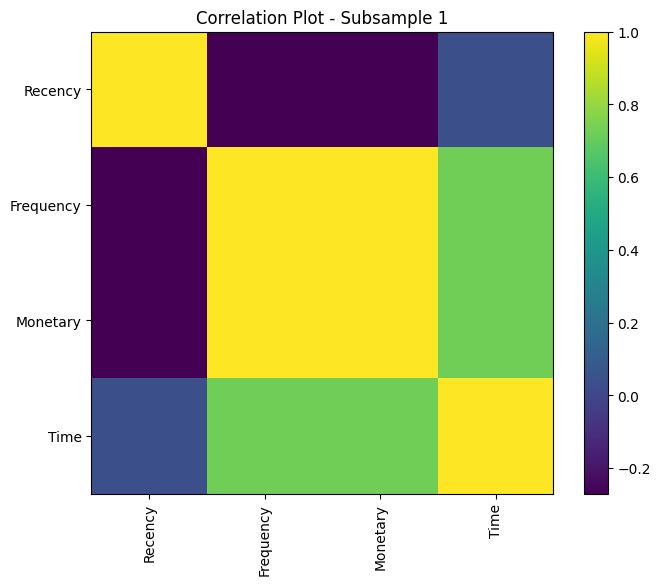

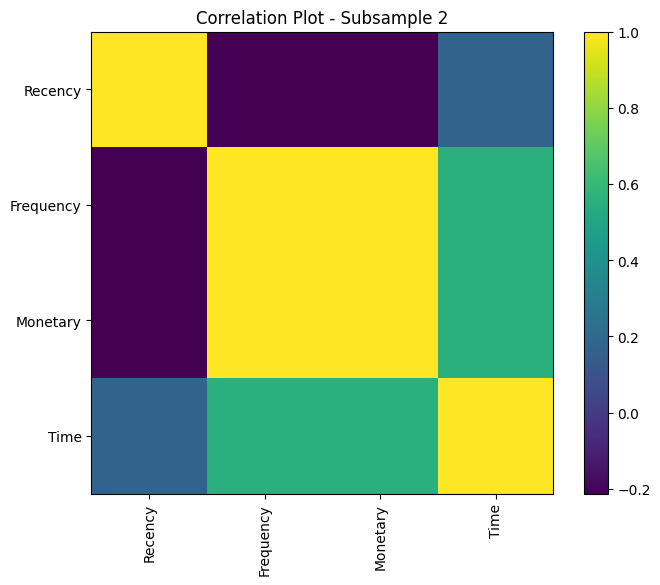

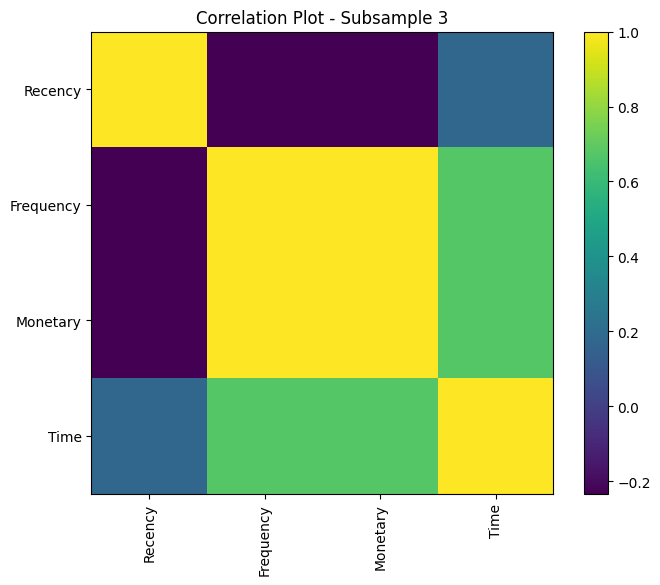

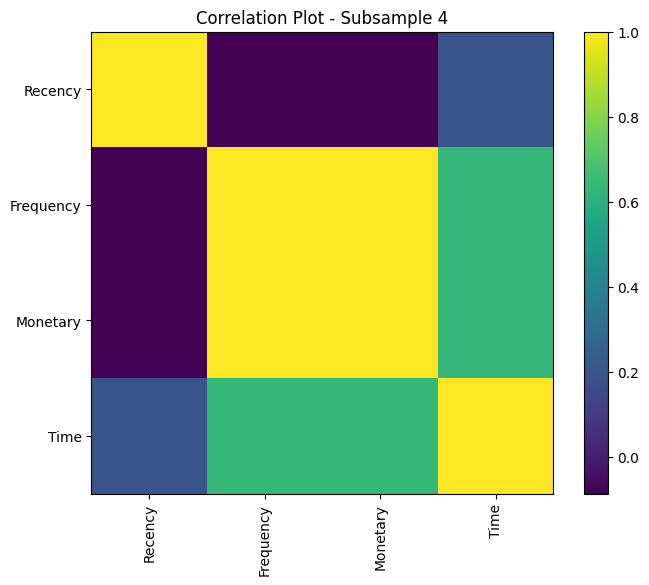

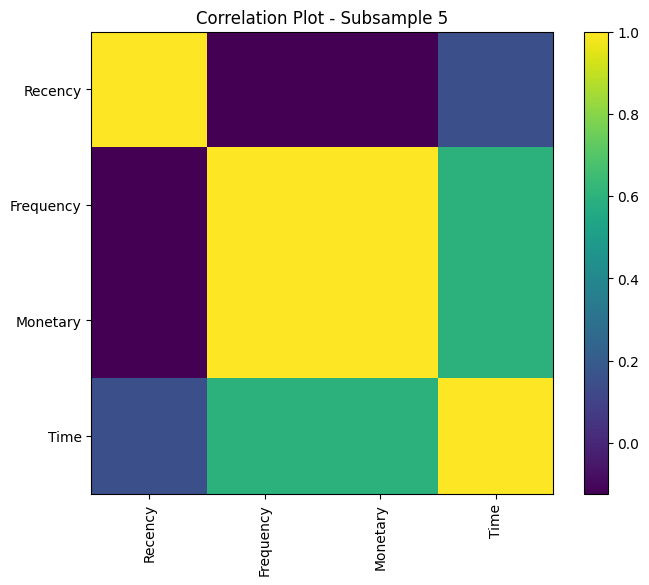

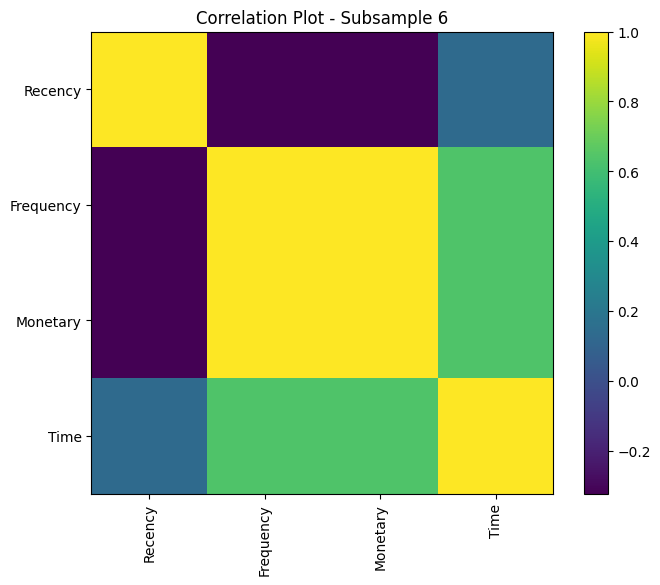

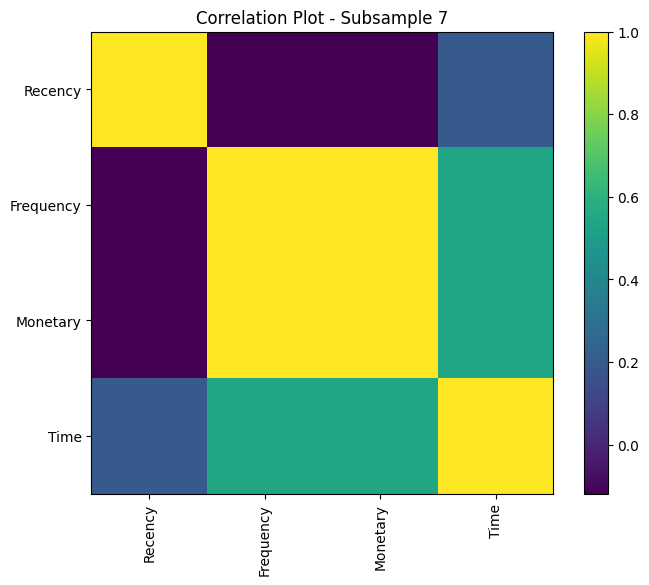

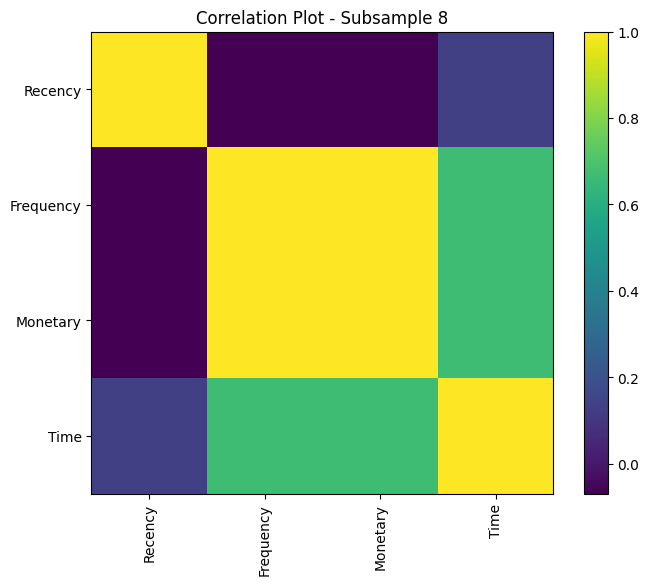

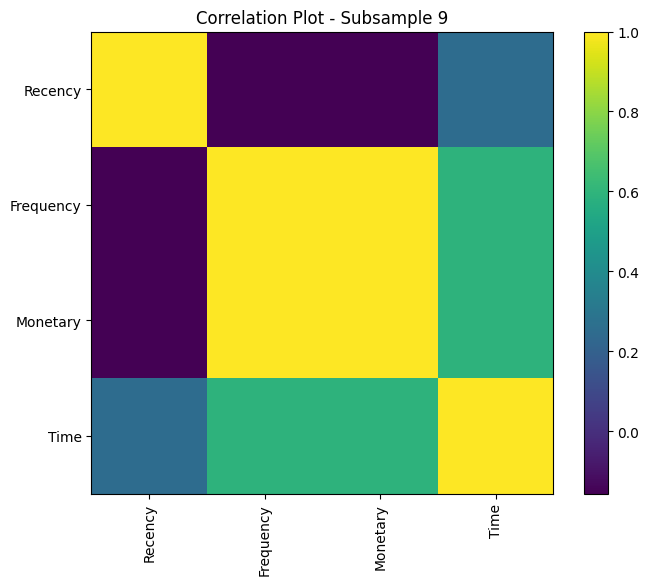

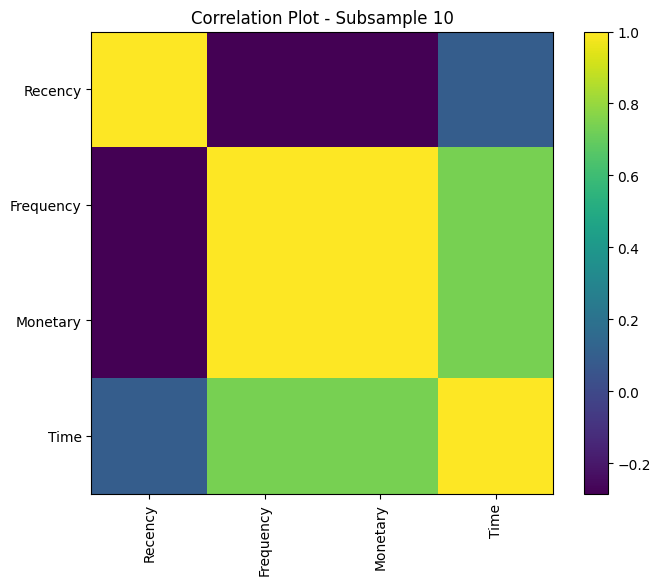

In [2]:
import matplotlib.pyplot as plt

df_exclusion = df.drop(columns=['Donated_Blood'])
# Define the number of subsamples
num_subsamples = 10
sample_size = len(df_exclusion) // num_subsamples

# Create correlation plots for each subsample
for i in range(num_subsamples):
    # Take a subsample
    subsample = df_exclusion.sample(n=sample_size)
    
    # Calculate correlation matrix
    corr = subsample.corr()
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.imshow(corr, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title(f"Correlation Plot - Subsample {i+1}")
    plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(np.arange(len(corr.columns)), corr.columns)
    plt.show()

**TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced**

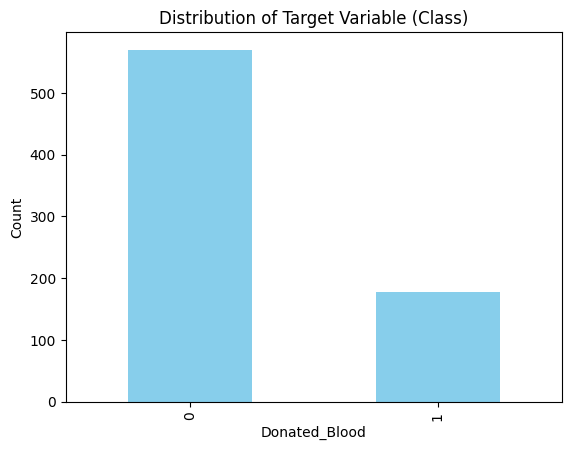

Imbalance Ratio: 0.31


In [4]:
# Check if the problem is a classification problem
if len(df['Donated_Blood'].unique()) <= 2:  
    # Plot the distribution of target variable to check for imbalance
    df['Donated_Blood'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Distribution of Target Variable (Class)')
    plt.xlabel('Donated_Blood')
    plt.ylabel('Count')
    plt.show()
    
    # Calculate the imbalance ratio
    class_counts = df['Donated_Blood'].value_counts()
    imbalance_ratio = class_counts.iloc[1] / class_counts.iloc[0]
    print(f"Imbalance Ratio: {imbalance_ratio:.2f}")
else:
    print("Not a binary classification problem.")


**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sea

<Figure size 1200x1000 with 0 Axes>

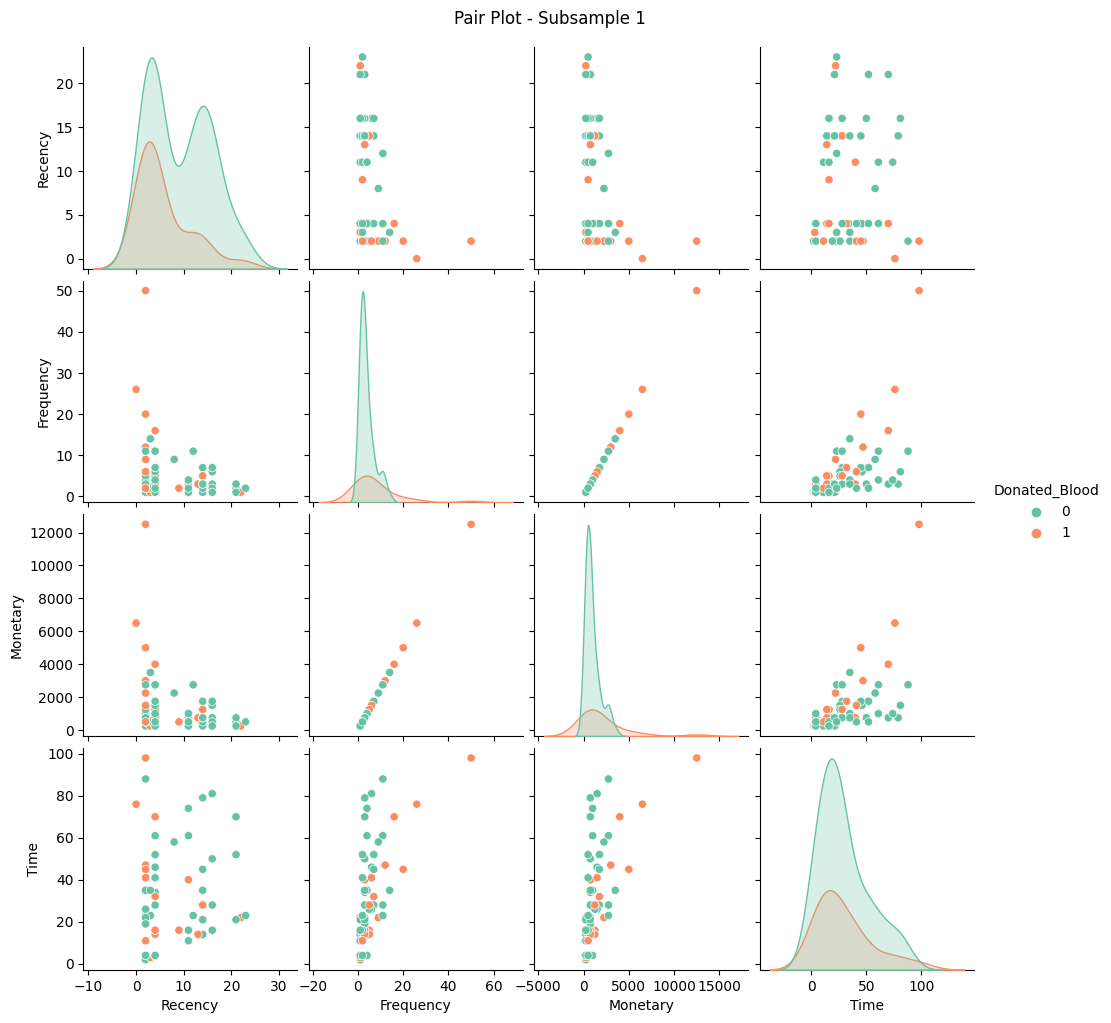

C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sea

<Figure size 1200x1000 with 0 Axes>

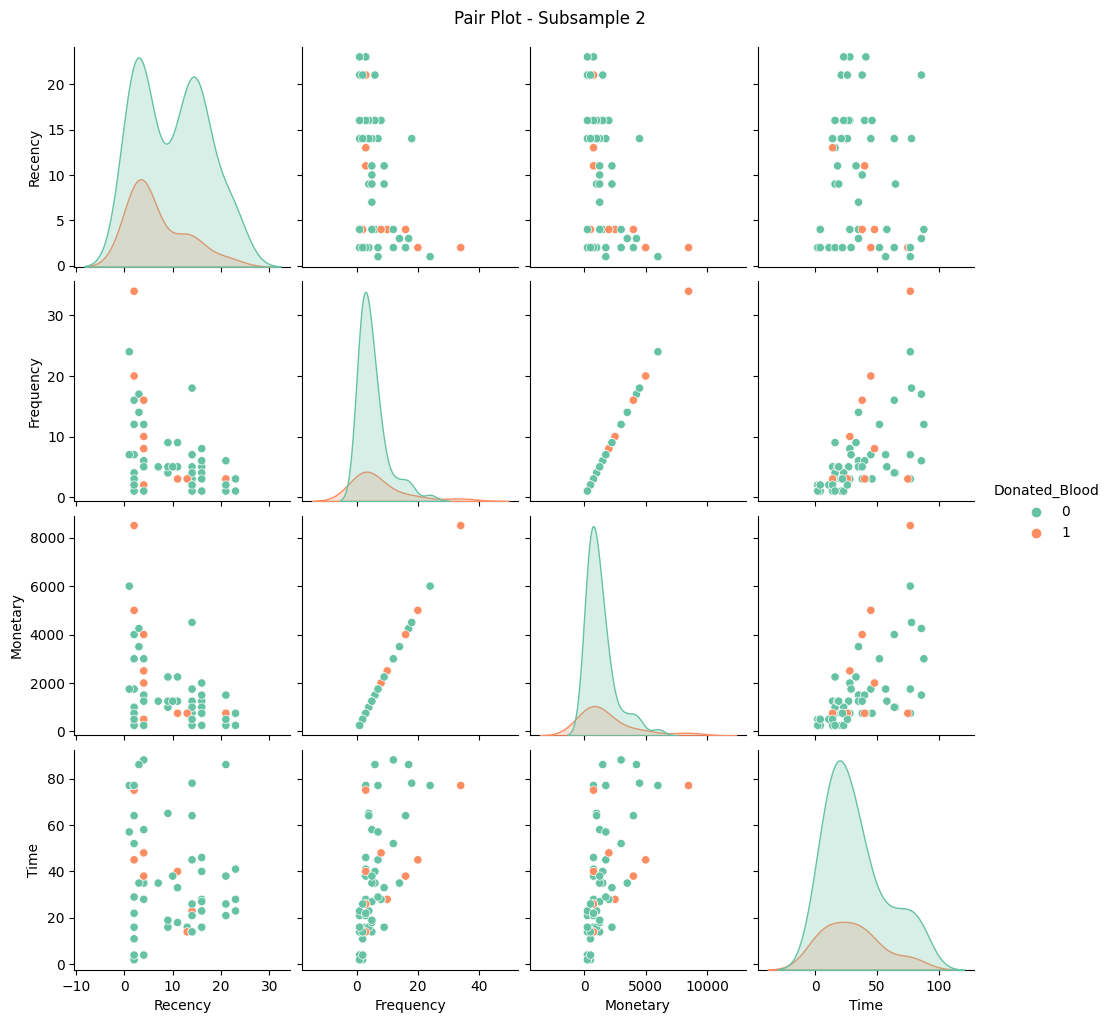

C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sea

<Figure size 1200x1000 with 0 Axes>

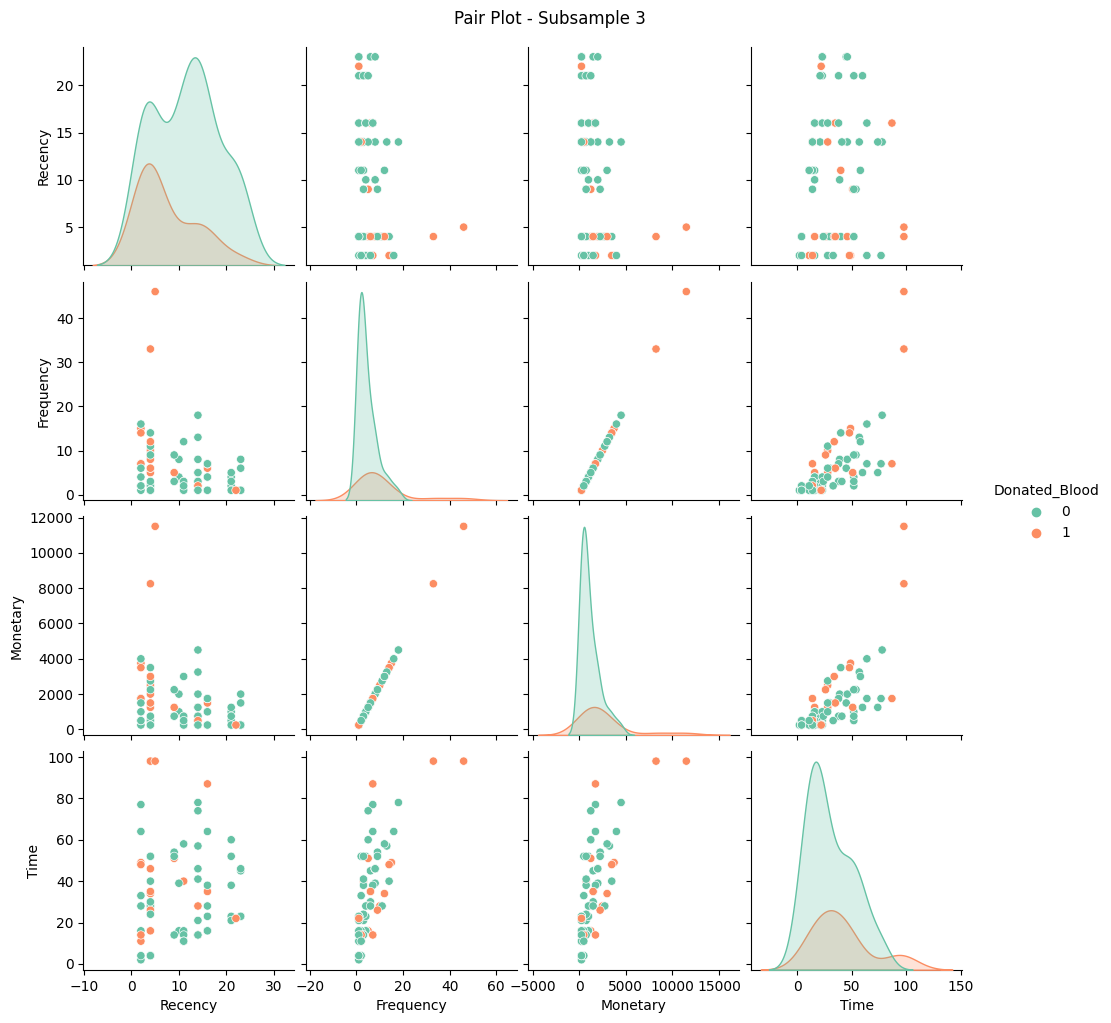

C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sea

<Figure size 1200x1000 with 0 Axes>

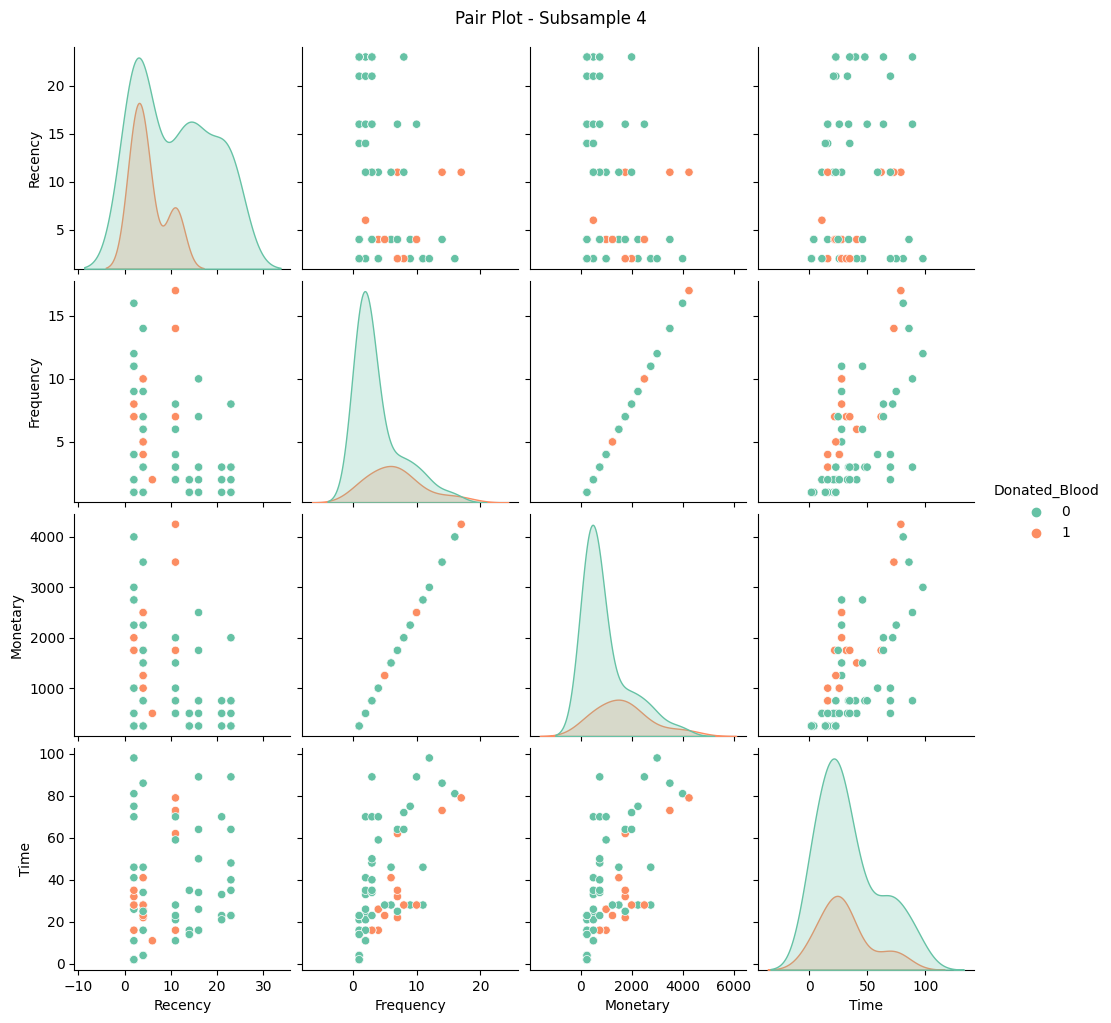

C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sea

<Figure size 1200x1000 with 0 Axes>

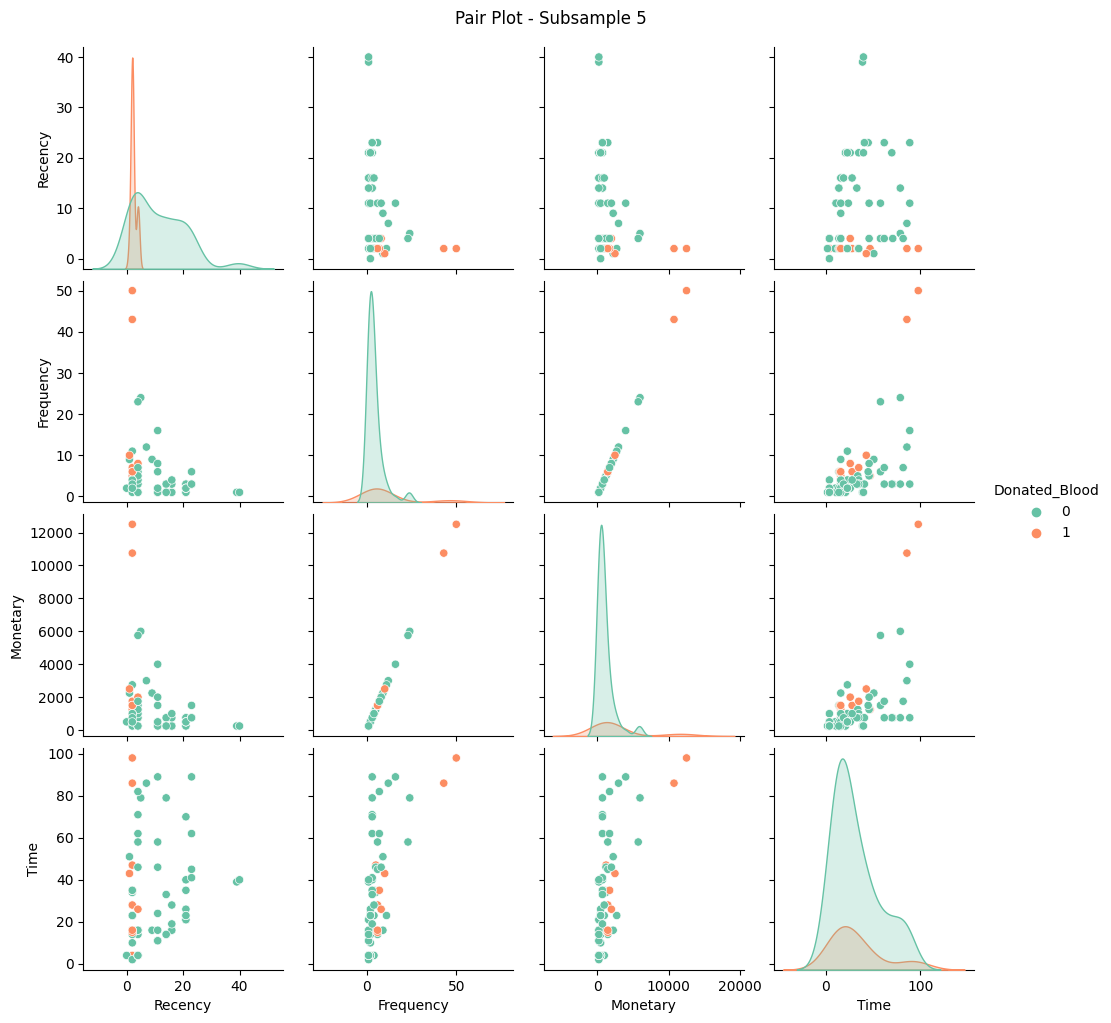

C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sea

<Figure size 1200x1000 with 0 Axes>

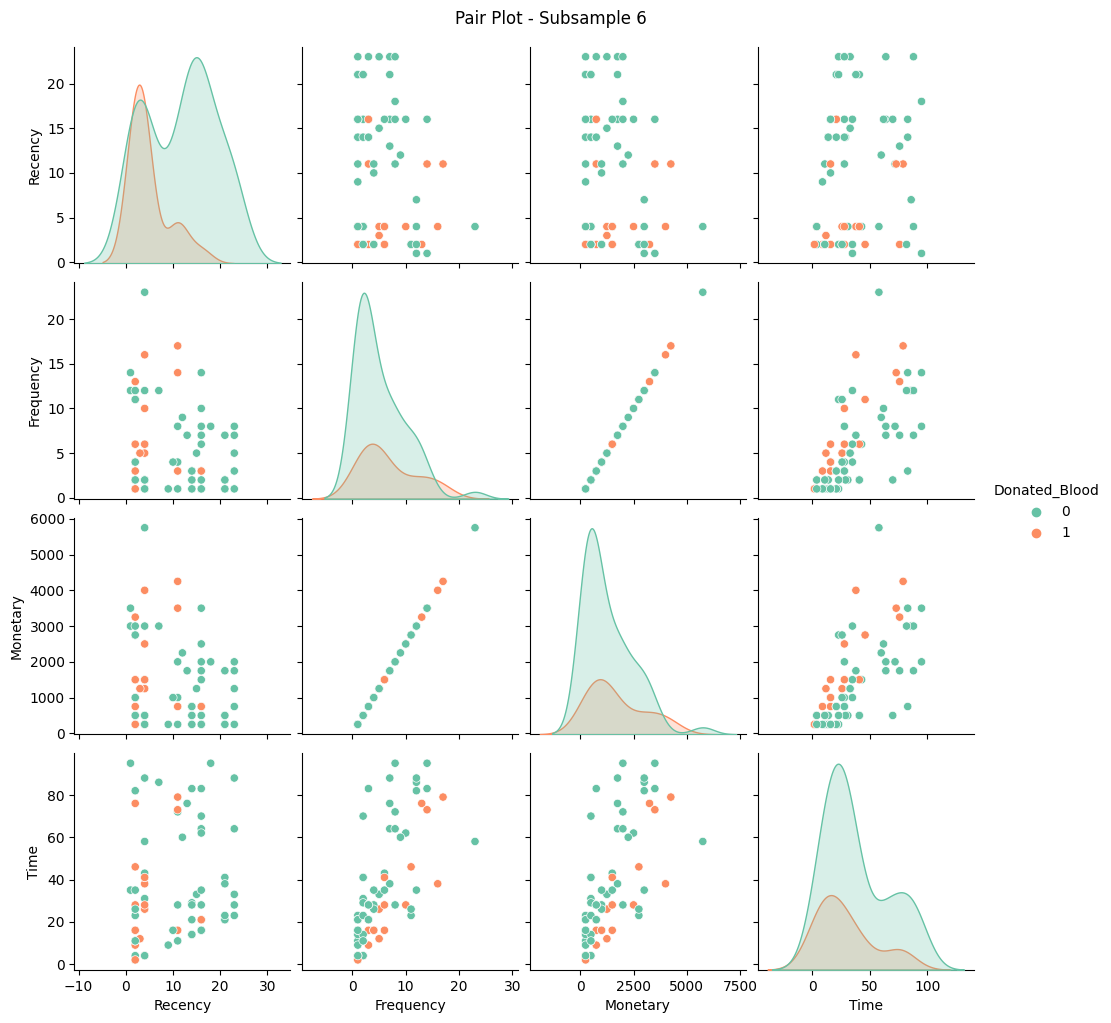

C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sea

<Figure size 1200x1000 with 0 Axes>

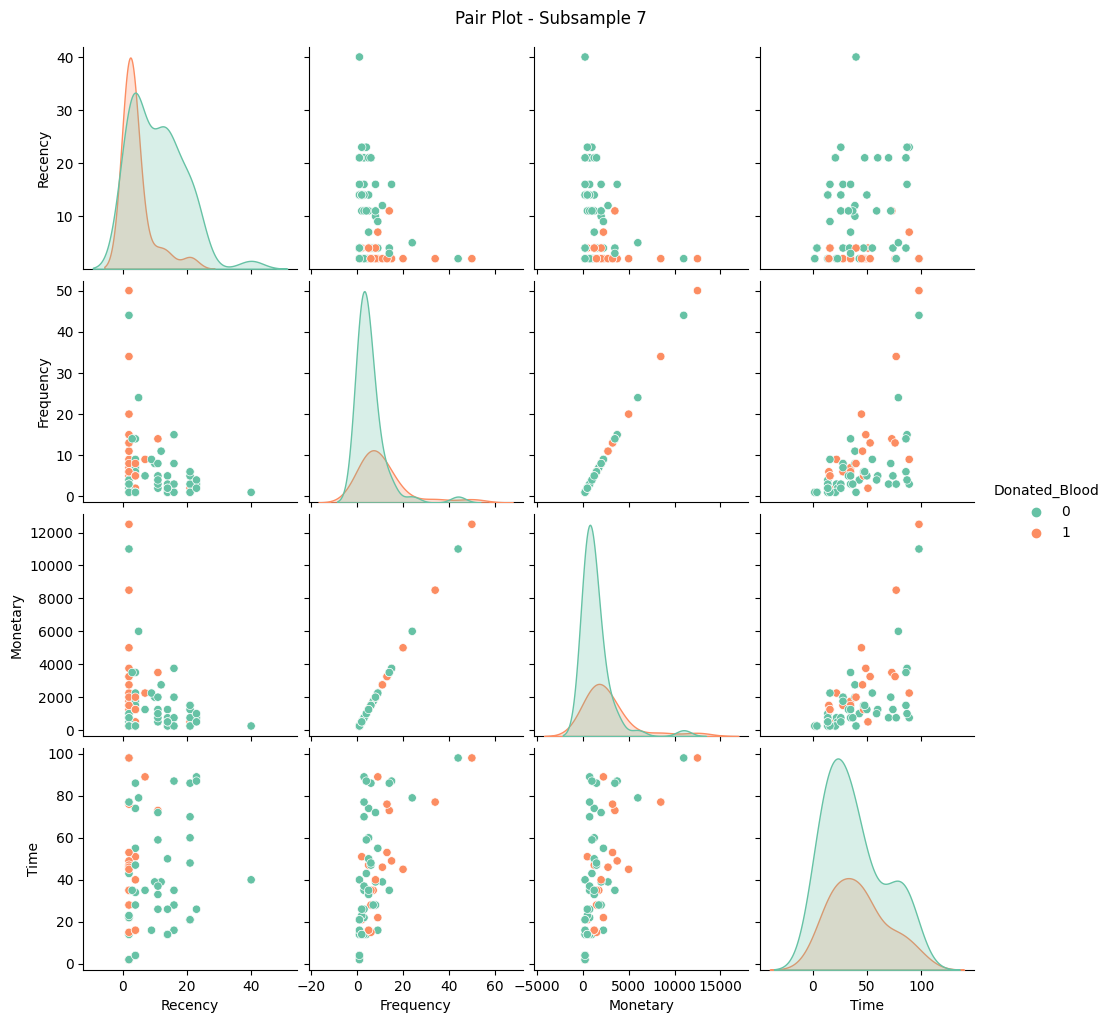

C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sea

<Figure size 1200x1000 with 0 Axes>

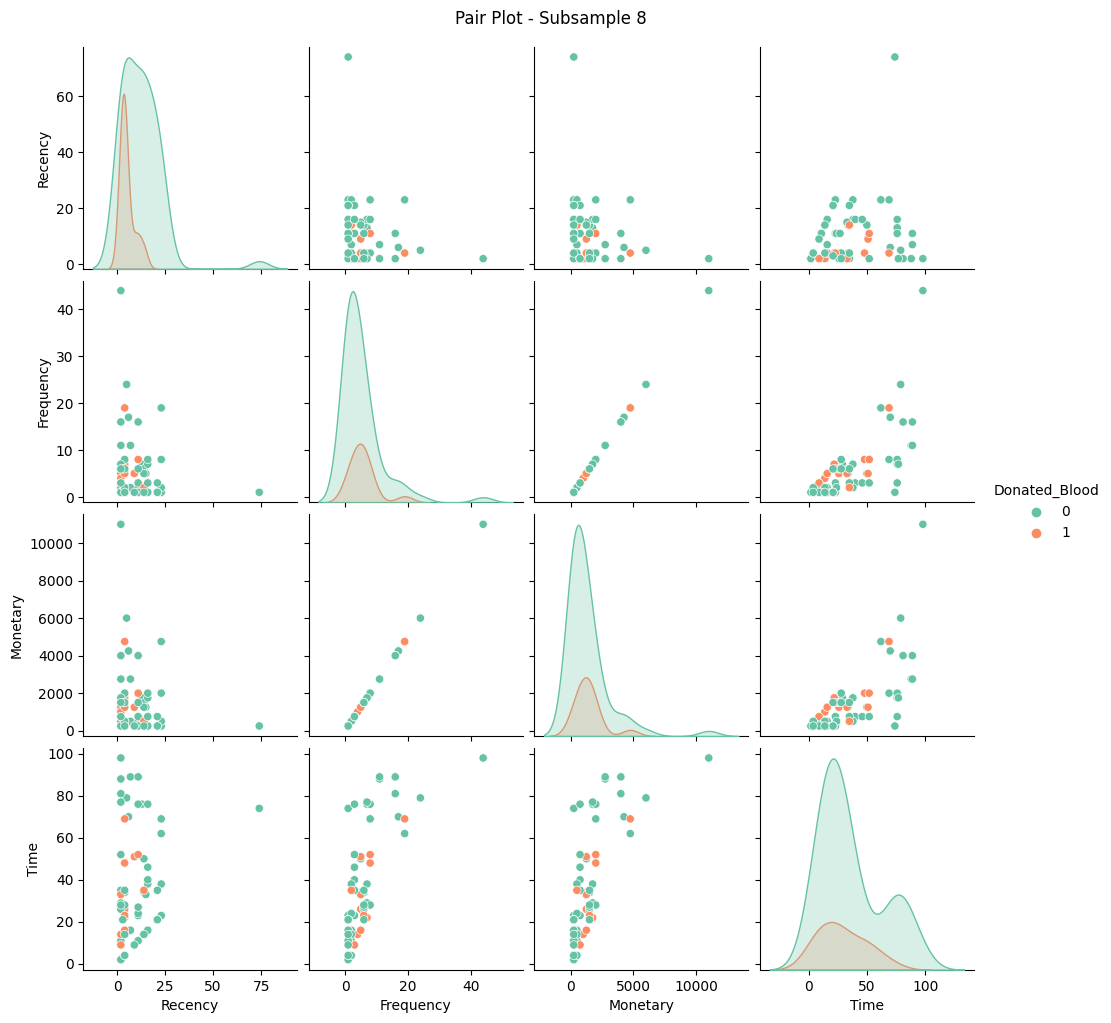

C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sea

<Figure size 1200x1000 with 0 Axes>

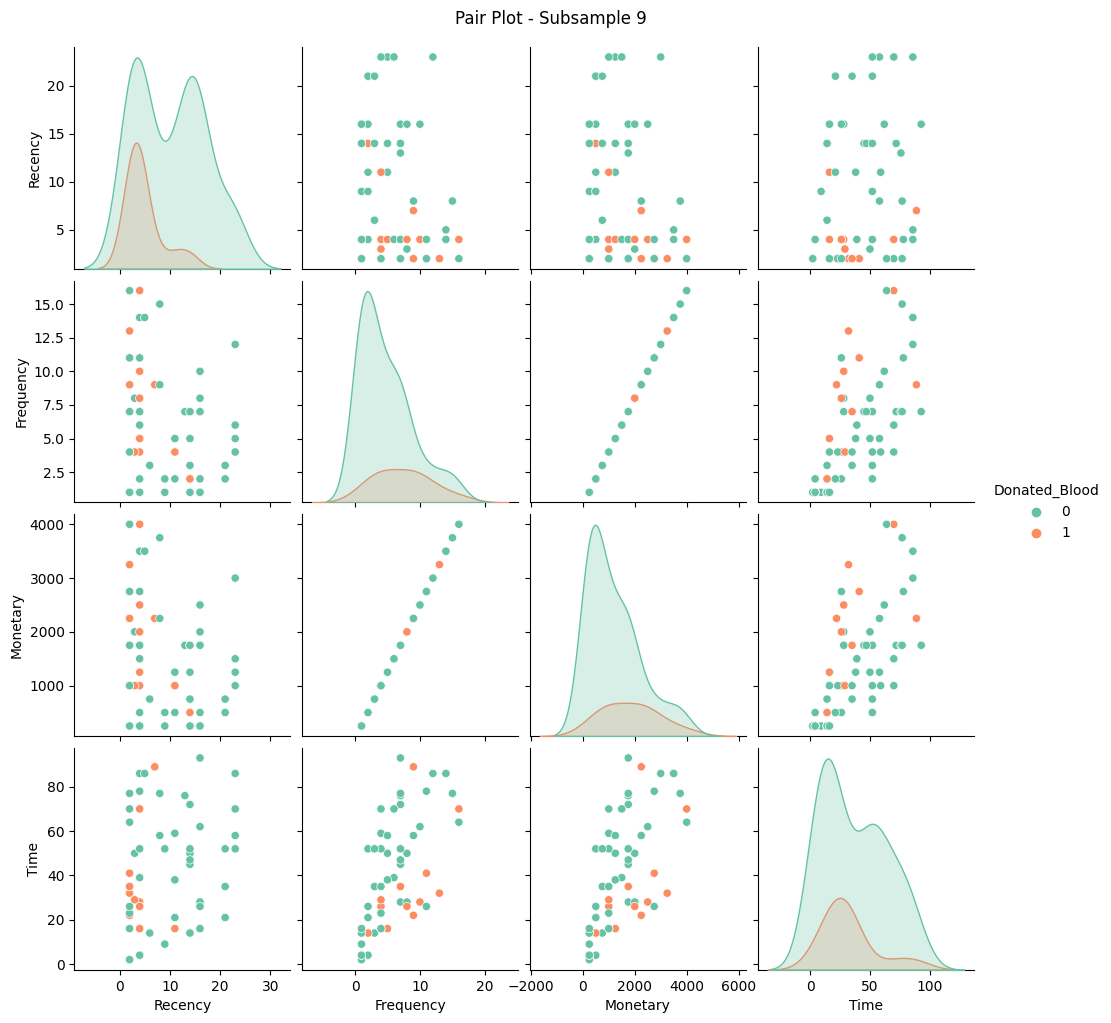

C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sea

<Figure size 1200x1000 with 0 Axes>

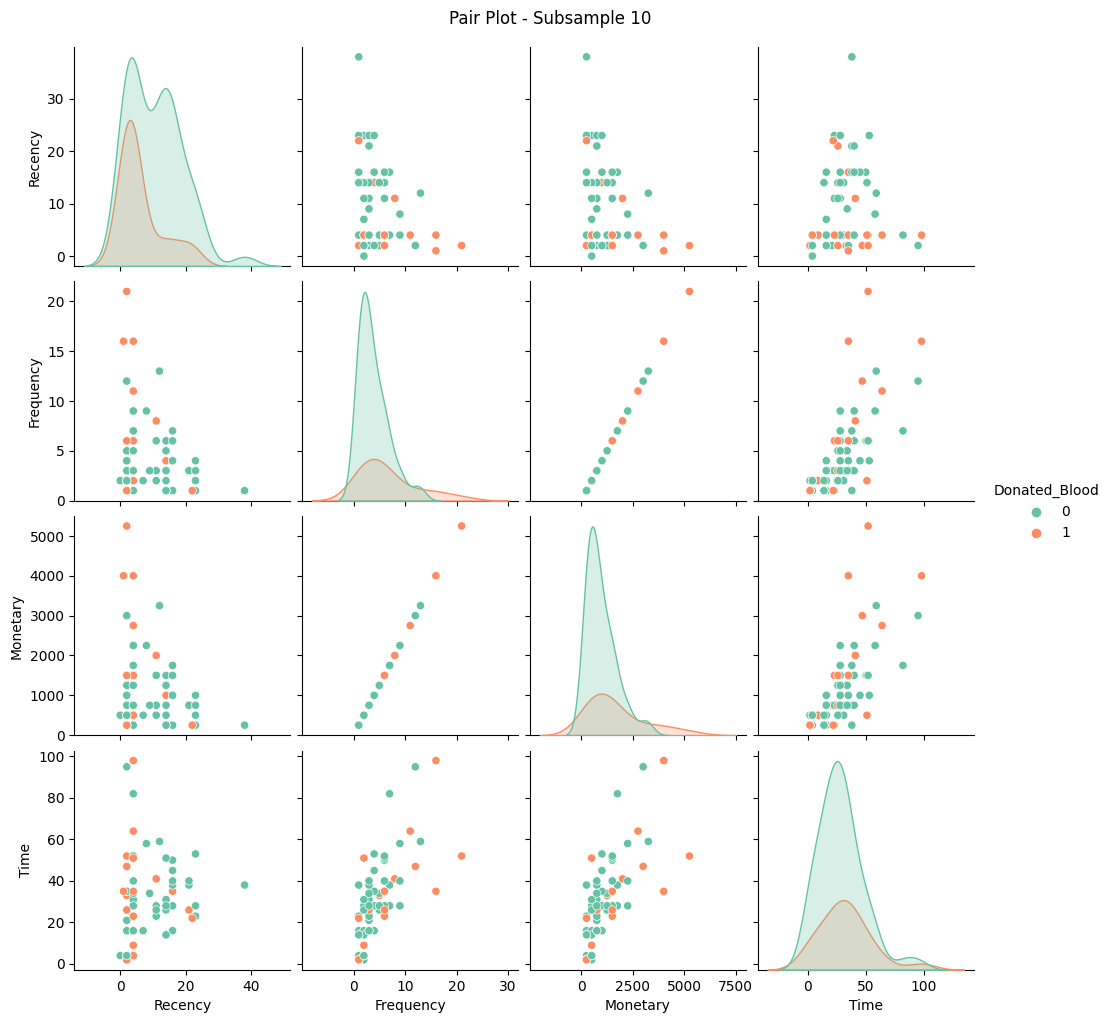

In [5]:
import seaborn as sns

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

# Define the number of subsamples
num_subsamples = 10
sample_size = len(df) // num_subsamples

# Create pair plots for each subsample
for i in range(num_subsamples):
    # Take a subsample
    subsample = df.sample(n=sample_size)
    
    # Create pair plot
    plt.figure(figsize=(12, 10))
    sns.pairplot(subsample, hue='Donated_Blood', diag_kind='kde', palette='Set2')
    plt.suptitle(f"Pair Plot - Subsample {i+1}", y=1.02)
    plt.show()


**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

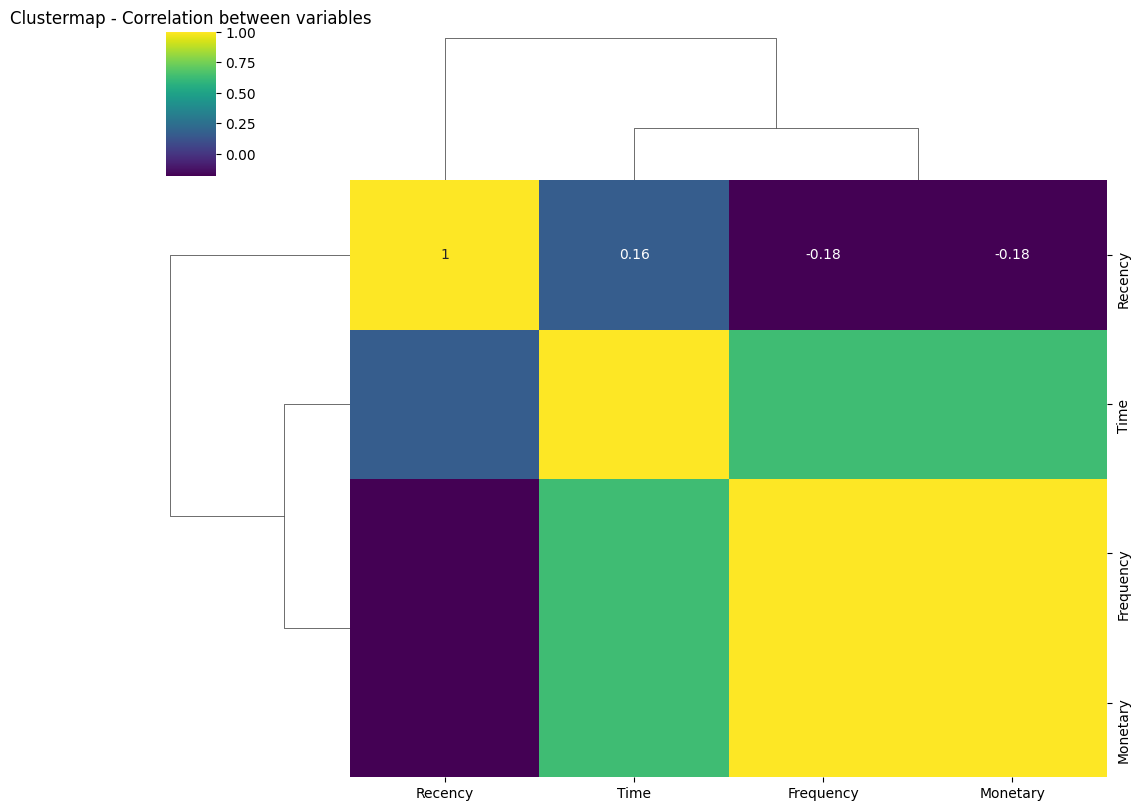

In [6]:
import seaborn as sns

# Drop the 'Class' column
df_features = df.drop(columns=['Donated_Blood'])

# Drop columns with infinite values
df_features = df_features.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

# Create a clustermap to explore relationships between variables
sns.clustermap(df_features.corr(), cmap='viridis', annot=True, figsize=(10, 8))
plt.title('Clustermap - Correlation between variables')
plt.show()


**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'Class' is the target variable
X = df.drop(columns=['Donated_Blood'])
y = df['Donated_Blood']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM modeling
svm_model = SVC(kernel='rbf', random_state=42)  # Using rbf kernel
svm_model.fit(X_train, y_train)

# Evaluate the model
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

print("SVM Model Performance:")
print("Accuracy:", svm_accuracy)
print("Classification Report:")
print(classification_report(y_test, svm_pred))

# Improving performance using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model with best parameters
best_svm_model = grid_search.best_estimator_
best_svm_pred = best_svm_model.predict(X_test)
best_svm_accuracy = accuracy_score(y_test, best_svm_pred)

print("\nImproved SVM Model Performance:")
print("Accuracy:", best_svm_accuracy)
print("Classification Report:")
print(classification_report(y_test, best_svm_pred))


SVM Model Performance:
Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       113
           1       1.00      0.03      0.05        37

    accuracy                           0.76       150
   macro avg       0.88      0.51      0.46       150
weighted avg       0.82      0.76      0.66       150

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  52.9s
[CV] END ......................C=0.1, gamma=1, kernel=linear; to